In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
%matplotlib inline

In [35]:
train = pd.read_csv('../data/churn_train.csv', parse_dates=['signup_date', 'last_trip_date'], infer_datetime_format=True)
test = pd.read_csv('../data/churn_test.csv')

In [36]:
train.shape

(40000, 12)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null datetime64[ns]
phone                     39681 non-null object
signup_date               40000 non-null datetime64[ns]
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 3.4+ MB


In [38]:
'''
Data Descriptions:

city: city this user signed up in
phone: primary device for this user
signup_date: date of account registration; in the form `YYYYMMDD`
last_trip_date: the last time this user completed a trip; in the form `YYYYMMDD`
avg_dist: the average distance (in miles) per trip taken in the first 30 days after signup
avg_rating_by_driver: the rider’s average rating over all of their trips
avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
surge_pct: the percent of trips taken with surge multiplier > 1
avg_surge: The average surge multiplier over all of this user’s trips
trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
luxury_car_user: TRUE if the user took a luxury car in their first 30 days; FALSE otherwise
weekday_pct: the percent of the user’s trips occurring during a weekday
'''

'\nData Descriptions:\n\ncity: city this user signed up in\nphone: primary device for this user\nsignup_date: date of account registration; in the form `YYYYMMDD`\nlast_trip_date: the last time this user completed a trip; in the form `YYYYMMDD`\navg_dist: the average distance (in miles) per trip taken in the first 30 days after signup\navg_rating_by_driver: the rider\xe2\x80\x99s average rating over all of their trips\navg_rating_of_driver: the rider\xe2\x80\x99s average rating of their drivers over all of their trips\nsurge_pct: the percent of trips taken with surge multiplier > 1\navg_surge: The average surge multiplier over all of this user\xe2\x80\x99s trips\ntrips_in_first_30_days: the number of trips this user took in the first 30 days after signing up\nluxury_car_user: TRUE if the user took a luxury car in their first 30 days; FALSE otherwise\nweekday_pct: the percent of the user\xe2\x80\x99s trips occurring during a weekday\n'

In [39]:
train.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


In [40]:
train.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,40000.000000,39838.000000,33472.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.791302,4.777434,4.601697,1.074956,8.857342,2.280700,60.874382
std,5.708056,0.448088,0.614810,0.222427,20.014008,3.811289,37.089619
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [41]:
# sort the data by the signup_date
# train.sort_values(by='signup_date', ascending=False, inplace=True)

In [43]:
print train['last_trip_date'].max()
print train['last_trip_date'].min()

2014-07-01 00:00:00
2014-01-01 00:00:00


In [60]:
# New column of whether or not they are retained
# Criteria: a user is 'retained' if they were “active” (i.e. took a trip) in the preceding 30 days
thirty_days_prior_to_pulling_data = train['last_trip_date'].max() - timedelta(days=30)
print thirty_days_prior_to_pulling_data
train['retained'] = train['last_trip_date'] > thirty_days_prior_to_pulling_data
del train['last_trip_date']

2014-06-01 00:00:00


In [61]:
train.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,retained
0,6.94,5.0,5.0,1.00,Astapor,Android,2014-01-12,0.0,0,False,100.0,False
1,8.06,5.0,5.0,1.00,Astapor,Android,2014-01-25,0.0,2,True,0.0,False
2,21.50,4.0,NaN,1.00,Winterfell,iPhone,2014-01-02,0.0,1,True,100.0,False
3,9.46,5.0,NaN,2.75,Winterfell,Android,2014-01-09,100.0,1,False,100.0,False
4,13.77,5.0,NaN,1.00,Winterfell,iPhone,2014-01-31,0.0,0,False,100.0,False
5,14.51,5.0,NaN,1.00,Astapor,iPhone,2014-01-29,0.0,0,True,100.0,False
6,4.87,4.7,4.0,1.00,Astapor,Android,2014-01-18,0.0,0,False,66.7,False
7,1.78,4.0,5.0,1.00,Winterfell,iPhone,2014-01-11,0.0,3,False,0.0,False
8,6.87,5.0,4.7,1.00,Astapor,Android,2014-01-01,0.0,3,False,66.7,False
9,2.41,5.0,3.0,1.00,Winterfell,iPhone,2014-01-28,0.0,1,False,100.0,False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112552850>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112dff3d0>]], dtype=object)

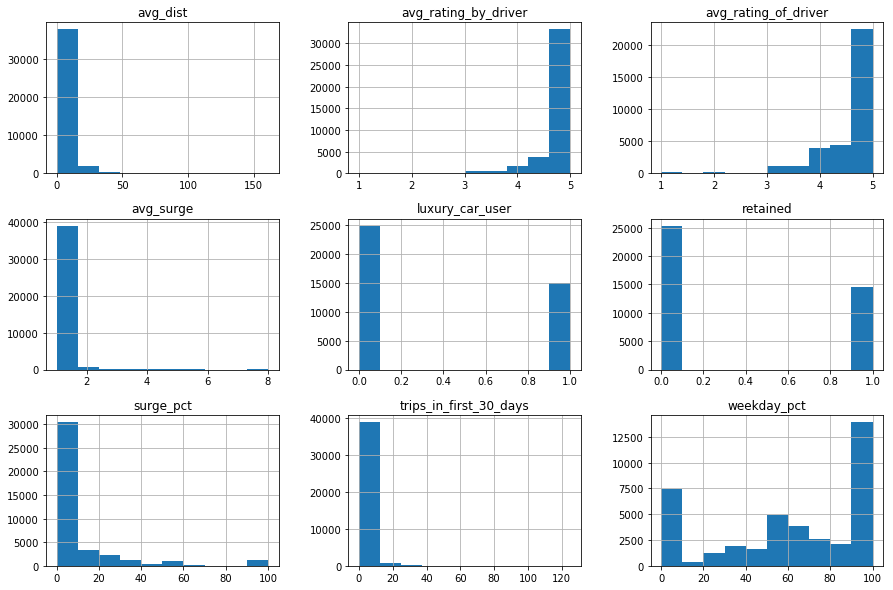

In [54]:
train.hist(figsize=(15, 10))

AttributeError: 'numpy.ndarray' object has no attribute 'find'

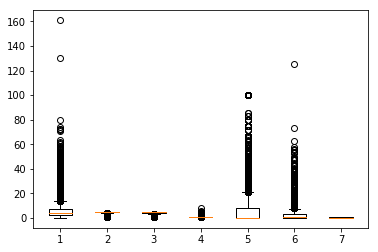

In [56]:
train.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115cb98d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b3dbf90>]], dtype=object)

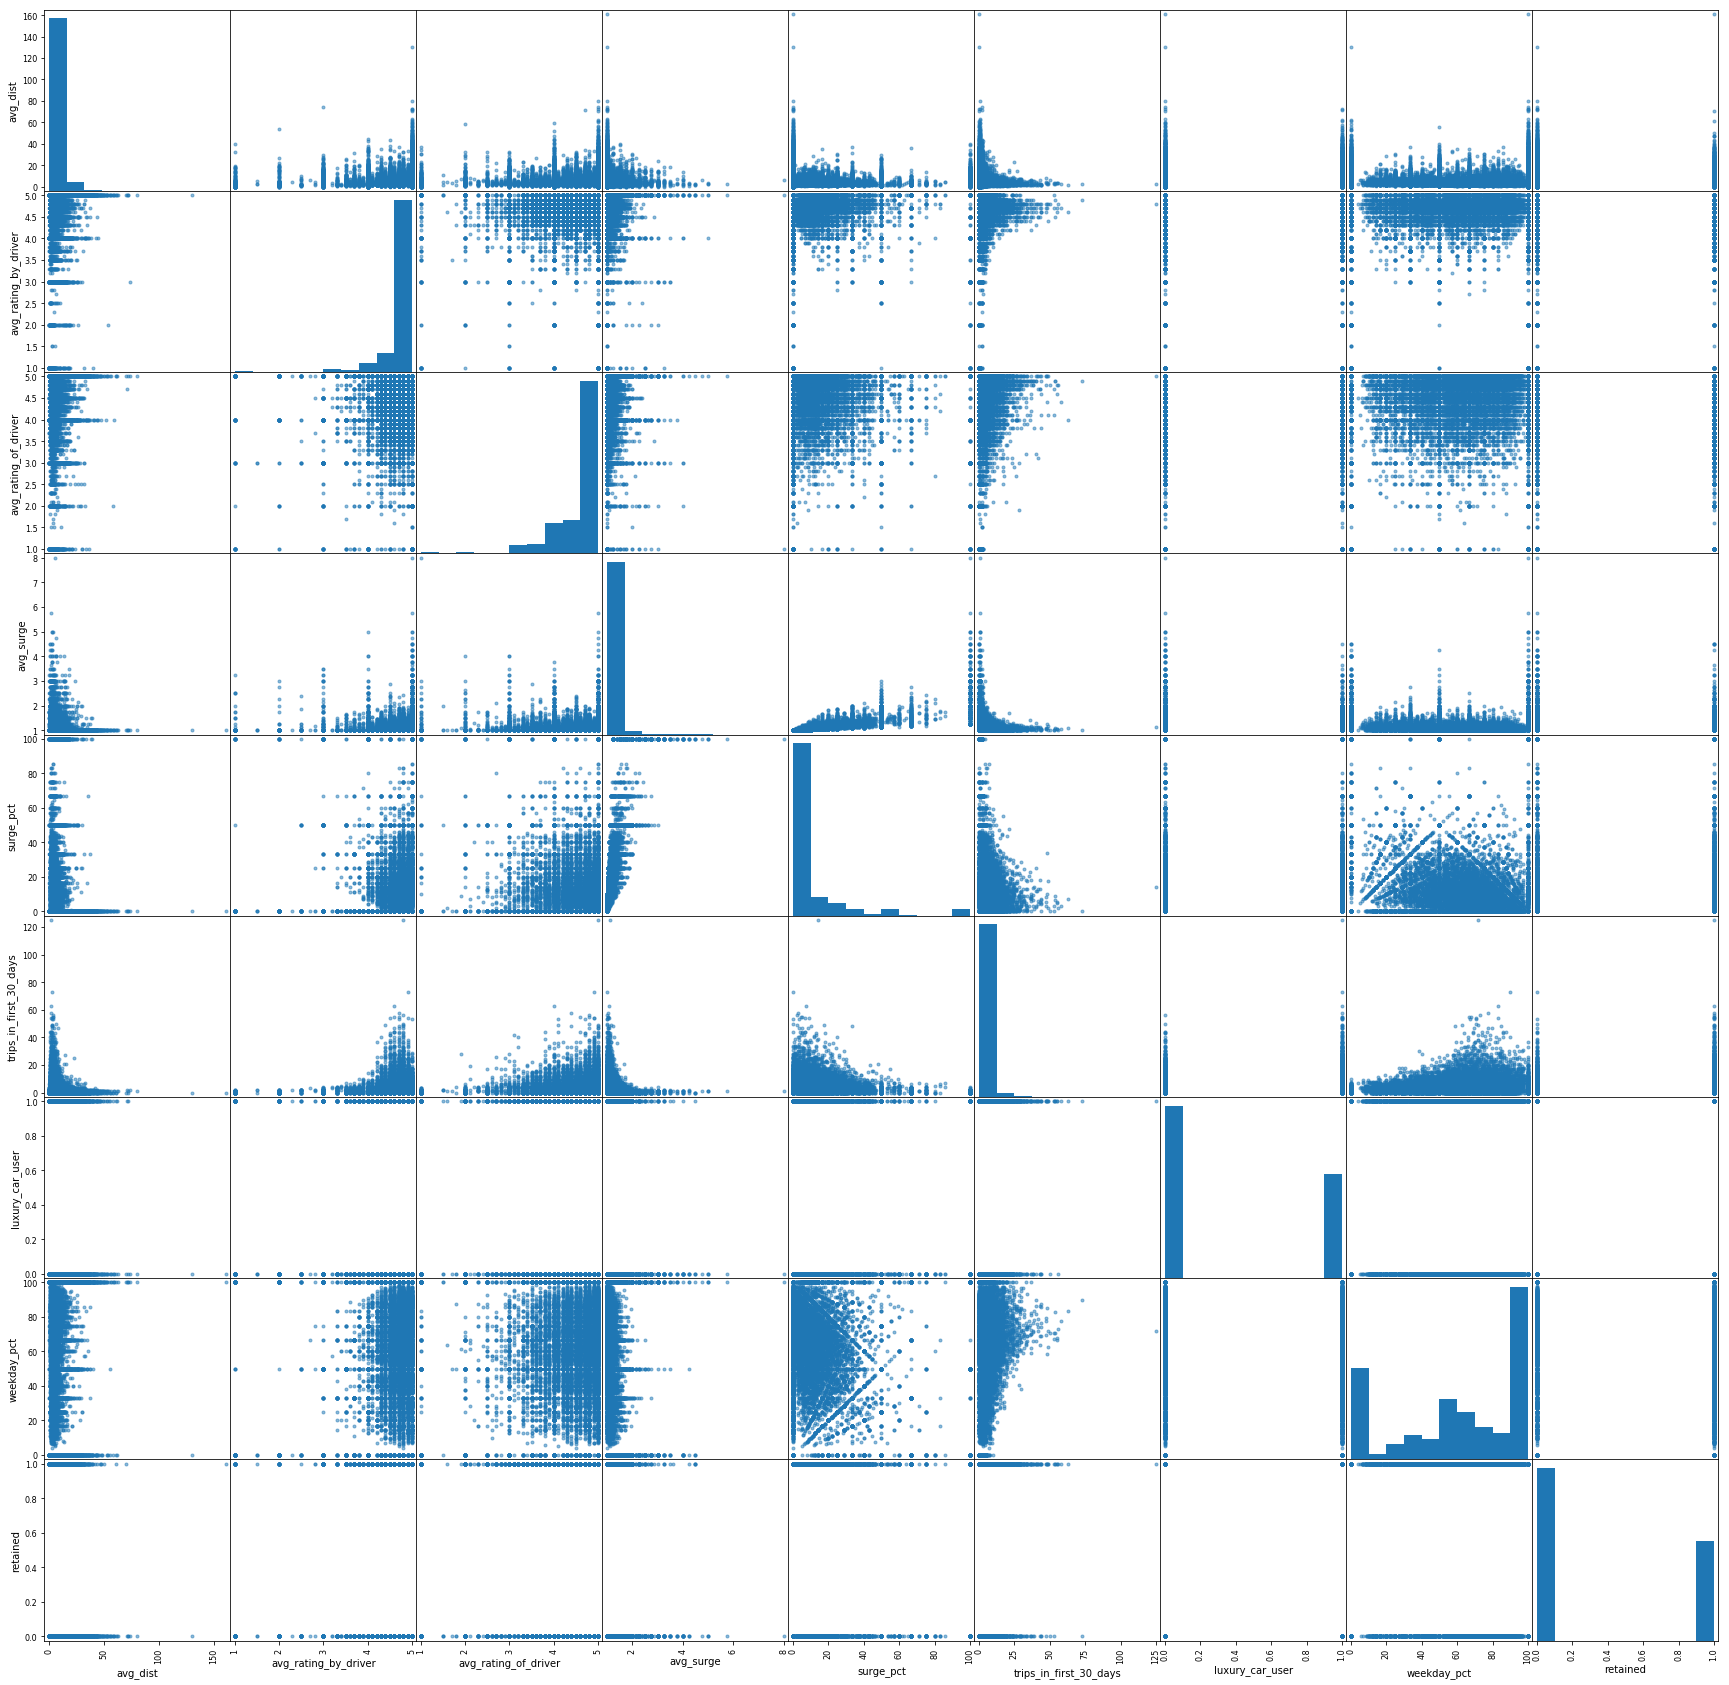

In [59]:
pd.scatter_matrix(train, figsize=(30, 30))